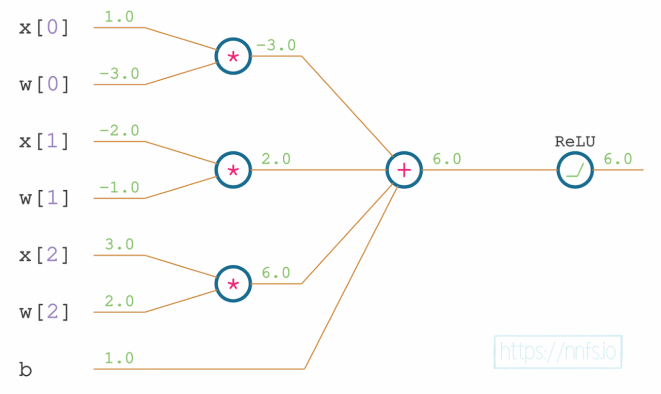

Let’s treat
all of these chained functions as one big function which takes input values (​x​), weights (​w)​ , and
bias (​b​), as inputs, and outputs ​y.​

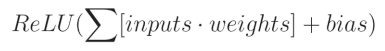

Which is equal to: 

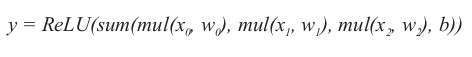

To calculate the impact of the example weight, ​w​0,​ on
the output, the chain rule tells us to 
1. calculate the derivative of ​ReLU​ with respect to its parameter,
which is the sum, 
2. then multiply it with the partial derivative of the sum operation with respect to
its ​mul(x​0,​ w​0)​ ​ input, as this input contains the parameter in question. 
3. Then, multiply this with the
partial derivative of the multiplication operation with respect to the ​x​0​ input. 

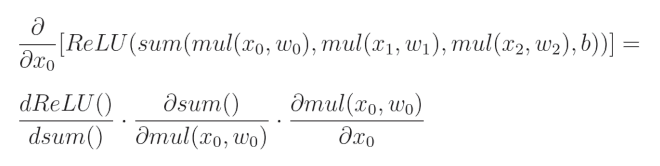

$\frac{\partial o_i}{\partial \text{net}_i}$

# Adding Backpropagation

During the backward pass, we’ll calculate the derivative of the loss function, and use it to
multiply with the derivative of the activation function of the output layer, then use this result to
multiply by the derivative of the output layer, and so on, through all of the hidden layers and
activation functions. 

Inside these layers, the derivative with respect to the weights and biases will
form the gradients that we’ll use to update the weights and biases. 

The derivatives with respect to
inputs will form the gradient to chain with the previous layer.

In [1]:
# forward pass

x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b

# ReLU activation function
y = max(z, 0)

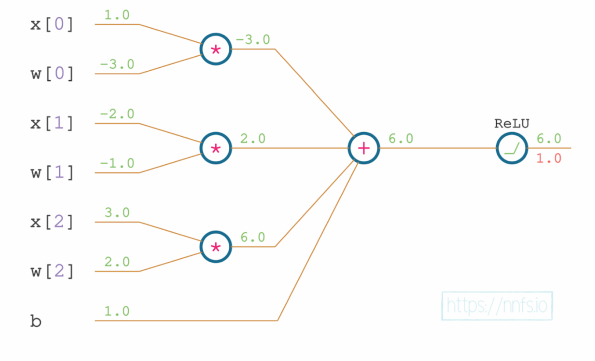

In [2]:
# backward pass

# the derivative from next layer
# we pretend than it is 1
dvalue= 1.0

# derivative of relu 
# We have to use the chain rule and multiply this derivative with the
# derivative received from the next layer (1)
d_dz_relu = dvalue * (1. if z > 0 else 0.)
print(f'd/dz relu = {d_dz_relu}')

# derivative of the sum function
# it is 1 because the derivative of sum function is always 1
d_dxw0_sum= 1 
d_dxw1_sum= 1 
d_dxw2_sum= 1 
d_db_sum= 1

d_dxw0_relu= d_dz_relu * d_dxw0_sum
d_dxw1_relu= d_dz_relu * d_dxw1_sum
d_dxw2_relu= d_dz_relu * d_dxw2_sum
d_db_relu= d_dz_relu * d_db_sum

print(f'd/dxw0 relu = {d_dxw0_relu}')
print(f'd/dxw1 relu = {d_dxw1_relu}')
print(f'd/dxw2 relu = {d_dxw2_relu}')
print(f'dsum_db = {d_db_sum}')

# derivative of the multiplication function
# mul= w * x + b
# to x
d_dx0_mul= w[0]
d_dx1_mul= w[1]
d_dx2_mul= w[2]
# to w
d_dw0_mul= x[0]
d_dw1_mul= x[1]
d_dw2_mul= x[2]

# to x
d_dx0_relu = d_dxw0_relu * d_dx0_mul
d_dx1_relu = d_dxw1_relu * d_dx1_mul
d_dx2_relu = d_dxw2_relu * d_dx2_mul
# to w
d_dw0_relu = d_dxw0_relu * d_dw0_mul
d_dw1_relu = d_dxw1_relu * d_dw1_mul
d_dw2_relu = d_dxw2_relu * d_dw2_mul

print(d_dx0_relu, d_dw0_relu, d_dx1_relu, d_dw1_relu, d_dx2_relu, d_dw2_relu)

d/dz relu = 1.0
d/dxw0 relu = 1.0
d/dxw1 relu = 1.0
d/dxw2 relu = 1.0
dsum_db = 1
-3.0 1.0 -1.0 -2.0 2.0 3.0


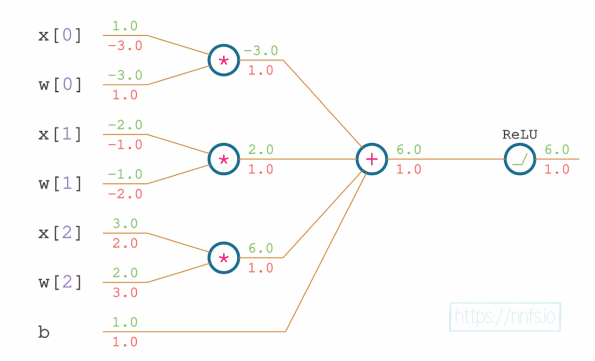

Now we want to simplify this, i.e. make it one function.

In [3]:
d_dx0_relu = d_dxw0_relu * d_dx0_mul

    # where
    # d_dx0_mul= w[0]
 
# then 
d_dx0_relu = d_dxw0_relu * w[0]

    # where
    # d_dxw0_relu = d_dz_relu * d_dxw0_sum

# then 
d_dx0_relu = d_dz_relu * d_dxw0_sum * w[0]

    # where
    # d_dxw0_sum= 1 

# then
d_dx0_relu = d_dz_relu * 1 * w[0]

    # where
    # d_dz_relu = dvalue * (1. if z > 0 else 0.)

# then 
d_dx0_relu = dvalue * (1. if z > 0 else 0.) * 1 * w[0]
d_dx0_relu = dvalue * (1. if z > 0 else 0.) * w[0] # delete * 1

Altogether, the partial derivatives above, combined into a vector, make up our gradients. Our
gradients could be represented as:

In [4]:
dx = [d_dx0_relu, d_dx1_relu, d_dx2_relu] # gradients on inputs
dw = [d_dw0_relu, d_dw1_relu, d_dw2_relu] # gradients on weights
db = d_db_relu # gradient on bias...just 1 bias here.

# Demonstration 

backpropagate the ReLU function for a single neuron and act as if we
intend to minimize the output for this single neuron